# Práctica 3

In [88]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

## Ejercicio 1: Regresión logística multi-clase

In [89]:
data = loadmat('ex3data1.mat')

y = data['y']
X = data['X']

(-0.5, 199.5, 19.5, -0.5)

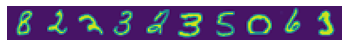

In [90]:
sample = np.random.choice(X.shape[0],10)
plt.imshow(X[sample, :].reshape(-1,20).T)
plt.axis('off')

In [91]:
y = np.ravel(y)
print(y)
m=len(y)
X_1 = np.hstack([np.ones([m, 1]), X])

[10 10 10 ...  9  9  9]


In [92]:
def sigmoide(z):
    return (1.0/(1.0+np.exp(-z)))

In [93]:
def coste(Theta, X, y):
    H = sigmoide(np.dot(X, Theta))
    Term1 = np.matmul(y, np.log(H))
    Term2 = np.matmul((1 - y), np.log(1 - H))
    cost = (- 1 / (len(y))) * np.sum(Term1 + Term2)
    return cost

In [94]:
def gradiente(Theta, X, y):
    H = sigmoide(np.dot(X, Theta))
    Dif = H - y
    grad = (1 / len(y)) * np.matmul(Dif, X)
    return grad

In [95]:
def coste_reg(Theta, X, y, Lambda):
    Term1 = coste(Theta, X, y)
    Term2 = (Lambda/(2*len(y))) * np.sum(Theta**2)
    cost = Term1 + Term2
    return cost 

In [96]:
def gradiente_reg(Theta, X, y, Lambda):
    grad = gradiente(Theta, X, y) + ((Lambda/len(y))*np.r_[[0],Theta[1:]])
    return grad

In [97]:
def yOneHot(y, num_etiquetas):
    y = (y-1)
    y_onehot = np.zeros((m, num_etiquetas)) #Matriz 5000 x 10
    for i in range(m):
        y_onehot[i][y[i]] = 1
    return y_onehot

In [98]:
def oneVsAll(X, y, num_etiquetas, reg):
    y_onehot = yOneHot(y,num_etiquetas)
    all_theta =np.zeros((num_etiquetas, X.shape[1]))
    theta = np.zeros(X.shape[1])
    for c in range(num_etiquetas):
        result = opt.fmin_tnc(func=coste_reg, x0=theta, fprime=gradiente_reg, args=(X,y_onehot[:, c], reg))
        all_theta[c]=result[0]
    return all_theta

In [99]:
Theta = oneVsAll(X_1,y,10,0.1)
print(Theta.shape)

(10, 401)


In [100]:
def prediccion(theta, X):
    y_prediccion = sigmoide(np.matmul(theta, np.transpose(X)))
    return y_prediccion

In [101]:
def evaluacion(resultados, y):
    y_ = y-1
    predicciones = resultados.argmax(axis = 0)
    comparacion = (predicciones == y_)*1
    porcentaje = (sum(comparacion)/len(comparacion)) *100
    return porcentaje

In [102]:
resultados = prediccion(Theta, X_1)
porcentaje = evaluacion(resultados, y)

obtener la predicción de cada clase para cada ejemplo de entrenamiento (sigmoide(np.matmul(theta, np.transpose(X)) de cada clase) obteniendo una matriz de 5000 x 10, 5000 casos de entrenamiento y para cada caso un array de 10 valores de 0 a 1 (resultado de aplicar la función sigmoide)
tomar el mayor valor de cada predicción  de cada caso de entrenamiento, entonces el caso de entrenamiento se asigna a la clase de la posición del mayor valor.
al final tenemos que obtener un vector 5000 de predicciones con valores del 0 al 9 y compararlo con el vector y-1 dado. 

In [103]:
print('El porcentaje de aciertos de oneVSall es {} % '.format(porcentaje))

El porcentaje de aciertos de oneVSall es 96.48 % 


## Ejercicio 2: Redes neuronales

In [104]:
weights = loadmat('ex3weights.mat')
theta1, theta2 = weights['Theta1'], weights['Theta2']

In [105]:
a_1 = X_1;
z_2 = np.matmul(a_1, theta1.T)
a_2 = sigmoide(z_2)
a_2 = np.hstack([np.ones([len(a_2), 1]), a_2])
z_3 = np.matmul(a_2, theta2.T)
a_3 = sigmoide(z_3)

In [106]:
print(a_3.shape)

(5000, 10)


In [107]:
resultados_rn = a_3.T
porcentaje_rn = evaluacion(resultados_rn, y)

97.52


In [108]:
print('El porcentaje de aciertos de la red neuronal es {} % '.format(porcentaje_rn))

El porcentaje de aciertos de la red neuronal es 97.52 % 
